# PARTE II - Desafio Modelo Preditivo
Agora que temos um dataset completo sem dados nulos, vamos arregaçar as mangas e fazer uma análise exploratória desses dados embusca de insghts valiosos.

In [2]:
# Import das bibliotecas que serão utilizadas no projeto
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Lendo o dataset feito na PARTE I desse projeto
df_explor = pd.read_csv('docs/dataset_sem_dados_faltantes.csv', sep=',')

In [4]:
display(df_explor)

,ID_CLIENTE,SAFRA_REF,DATA_EMISSAO_DOCUMENTO,DATA_PAGAMENTO,DATA_VENCIMENTO,VALOR_A_PAGAR,TAXA,RENDA_MES_ANTERIOR,NO_FUNCIONARIOS,DATA_CADASTRO,FLAG_PF,SEGMENTO_INDUSTRIAL,DOMINIO_EMAIL,PORTE,CEP_2_DIG
0,1661240395903230676,2018-08,2018-08-17,2018-09-06,2018-09-06,35516.41,6.99,217640.0,115.0,2013-08-22,Juridico,Serviços,YAHOO,PEQUENO,65
1,1661240395903230676,2018-08,2018-08-19,2018-09-11,2018-09-10,17758.21,6.99,217640.0,115.0,2013-08-22,Juridico,Serviços,YAHOO,PEQUENO,65
2,1661240395903230676,2018-08,2018-08-26,2018-09-18,2018-09-17,17431.96,6.99,217640.0,115.0,2013-08-22,Juridico,Serviços,YAHOO,PEQUENO,65
3,1661240395903230676,2018-08,2018-08-30,2018-10-11,2018-10-05,1341.00,6.99,217640.0,115.0,2013-08-22,Juridico,Serviços,YAHOO,PEQUENO,65
4,1661240395903230676,2018-08,2018-08-31,2018-09-20,2018-09-20,21309.85,6.99,217640.0,115.0,2013-08-22,Juridico,Serviços,YAHOO,PEQUENO,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77262,2951563549197799278,2021-06,2021-06-30,2021-07-16,2021-07-16,89980.00,5.99,280343.0,161.0,2000-08-15,Juridico,Comércio,AOL,PEQUENO,13
77263,5220206408301580591,2021-06,2021-06-30,2021-08-16,2021-08-16,42239.00,5.99,235315.0,87.0,2021-04-08,Juridico,Indústria,GMAIL,GRANDE,25
77264,5860276371789140450,2021-06,2021-06-30,2021-07-16,2021-07-16,20921.50,5.99,100006.0,122.0,2011-02-15,Juridico,Serviços,HOTMAIL,GRANDE,67
77265,2814790209436551216,2021-06,2021-06-30,2021-07-16,2021-07-16,90231.05,6.99,234489.0,115.0,2021-05-13,Juridico,Serviços,YAHOO,MEDIO,14


In [5]:
# Função que personaliza o método describe() do pandas
def descricão(df):
    resumo = pd.DataFrame({
        'Coluna': df.columns,
        'Tipo': df.dtypes.values,
        'Quantidade de Dados Não Vazios': df.notna().sum().values,
        'Quantidade de Dados Vazios': df.isna().sum().values,
        'Porcentagem de Valor Vazios (%)': (df.isna().mean() * 100).round(2).values
    })

    styled = (resumo.style
        .set_properties(**{
            'background-color': "#0f010194", 
            'border-color': 'black',
            'text-align': 'center'
        })
        .background_gradient(subset=['Porcentagem de Valor Vazios (%)'], cmap='Reds')
        .bar(subset=['Quantidade de Dados Vazios'], color='lightblue')
        .set_table_styles([
            {
                'selector': 'th',
                'props': [
                    ('background-color', '#0d253f'),
                    ('color', 'white'),
                    ('text-align', 'center'),
                    ('font-size', '12px')
                ]
            }
        ])
    )
    return styled

In [6]:
descricão(df_explor)

,Coluna,Tipo,Quantidade de Dados Não Vazios,Quantidade de Dados Vazios,Porcentagem de Valor Vazios (%)
0,ID_CLIENTE,int64,77267,0,0.000000
1,SAFRA_REF,object,77267,0,0.000000
2,DATA_EMISSAO_DOCUMENTO,object,77267,0,0.000000
3,DATA_PAGAMENTO,object,77267,0,0.000000
4,DATA_VENCIMENTO,object,77267,0,0.000000
5,VALOR_A_PAGAR,float64,77267,0,0.000000
6,TAXA,float64,77267,0,0.000000
7,RENDA_MES_ANTERIOR,float64,77267,0,0.000000
8,NO_FUNCIONARIOS,float64,77267,0,0.000000
9,DATA_CADASTRO,object,77267,0,0.000000


# 2 Analise Exploratória dos Dados

## 2.1 Empresa PJ ou PF

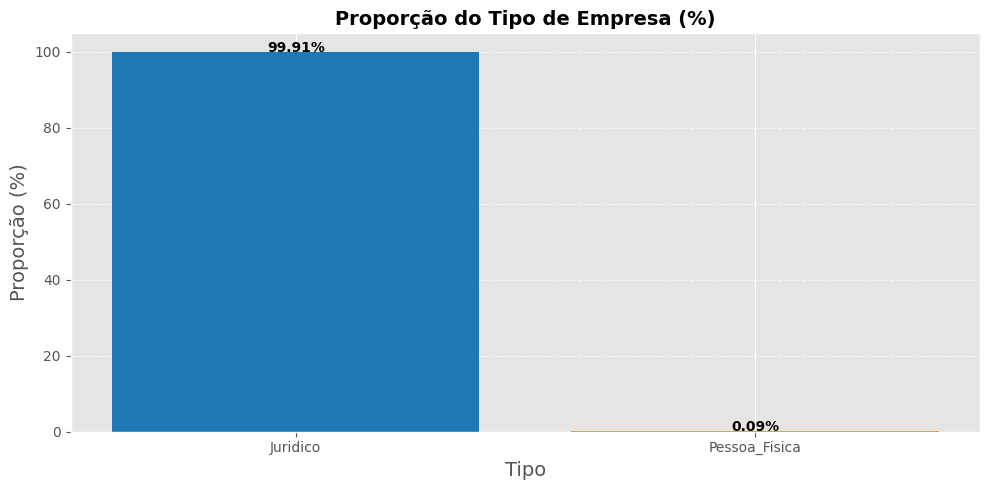

In [ ]:
# Classificação do Tipo de Empresa (PJ ou PF)
contagem_tipo = df_explor['FLAG_PF'].value_counts(normalize=True)*100

# Gráfico do tipo de empresa
plt.figure(figsize=(10,5))
plt.style.use('ggplot')
plt.bar(contagem_tipo.index, contagem_tipo.values, color=['#1f77b4', '#ff7f0e'])

# Título e rótulos
plt.title('Proporção do Tipo de Empresa (%)', fontsize=14, fontweight='bold')
plt.xlabel('Tipo', fontsize=14)
plt.ylabel('Proporção (%)', fontsize=14)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.6)

for i, valor in enumerate(contagem_tipo.values):
    plt.text(i, valor + 0.1, f'{valor:.2f}%', ha='center', fontsize=10, fontweight='bold')

plt.show()

Quase 100% dos dados é composto por empresa do tipo PJ (Pessoa Jurídica).

## 2.1 Tipo de Email Utilizado
É de extrema importância termos dados de contato dos clientes, pois assim, podemos manter uma relação de proximidade com o cliente, isso pode ser útil para oferecer serviços, cobrança, novas ofertas, etc. 

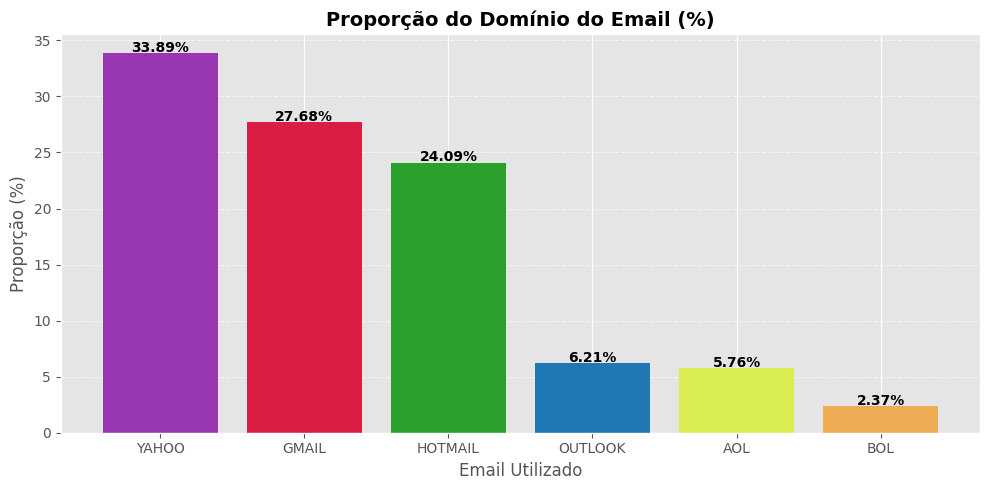

In [8]:
# Contagem dos email utilizado
email_contagem = df_explor['DOMINIO_EMAIL'].value_counts(normalize=True)*100

# Gráfico dos Email utilizados
# Lista de cores — pode ser qualquer sequência
cores = ['#9937B3', '#DB1D43', '#2ca02c', '#1f77b4', '#DAED51', '#EDAC51']
plt.figure(figsize=(10,5))
plt.style.use('ggplot')
plt.bar(email_contagem.index, email_contagem.values, color=cores[:len(email_contagem)])

# Título e rótulos
plt.title('Proporção do Domínio do Email (%)', fontsize=14, fontweight='bold')
plt.xlabel('Email Utilizado', fontsize=12)
plt.ylabel('Proporção (%)', fontsize=12)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.6)

for i, valor in enumerate(email_contagem.values):
    plt.text(i, valor + 0.1, f'{valor:.2f}%', ha='center', fontsize=10, fontweight='bold')

plt.show()

## 2.2 Analise do Tamanho da Empresa
O tamanho da empresa pode ser útil para ver a capacidade de produção que ela tem, se for grande, pode ter um elevado número de funcionários, gastos ou renda altos.

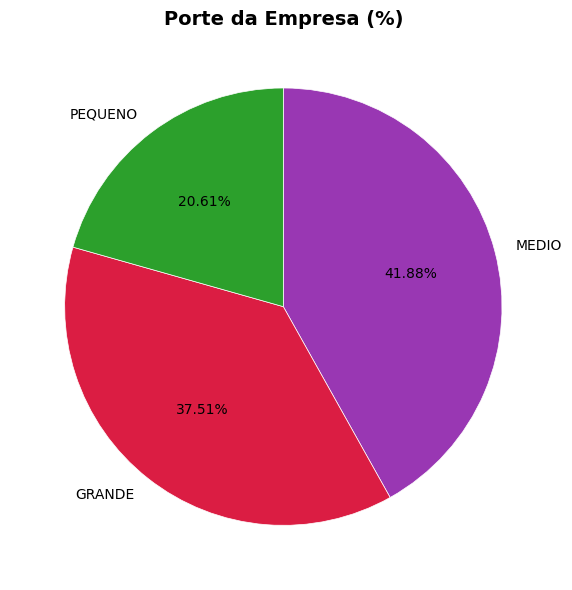

In [15]:
# Analisando o Porte das Empresas
porte_contagem = df_explor['PORTE'].value_counts(normalize=True)*100

# Gráfico
# Lista de cores — pode ser qualquer sequência
cores = ['#9937B3', '#DB1D43', '#2ca02c']
plt.figure(figsize=(10,6))
plt.style.use('ggplot')

plt.pie(
    porte_contagem.values,
    labels=porte_contagem.index,
    autopct='%1.2f%%',
    colors=cores[:len(porte_contagem)],
    startangle=90,
    counterclock=False,
    wedgeprops={'edgecolor': 'white'}
)

plt.title('Porte da Empresa (%)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


## 2.3 Relação entre Número de Funcionários e o Porte da Empresa
O porte da empresa e a quantidade de funcionários costumam estar diretamente relacionados — e isso é algo muito comum em análises de crédito, risco e mercado.

In [16]:
# Relação entre número de funcionarios e o tamanho da empresa
df_explor.groupby('PORTE')['NO_FUNCIONARIOS'].describe().style.background_gradient(cmap='Blues')

,count,mean,std,min,25%,50%,75%,max
PORTE,,,,,,,,
GRANDE,28984.000000,120.491099,15.796407,70.000000,111.000000,121.000000,130.000000,198.000000
MEDIO,32358.000000,117.811453,17.181269,60.000000,107.000000,117.000000,129.000000,179.000000
PEQUENO,15925.000000,113.524333,18.400908,67.000000,100.000000,114.000000,124.000000,187.000000


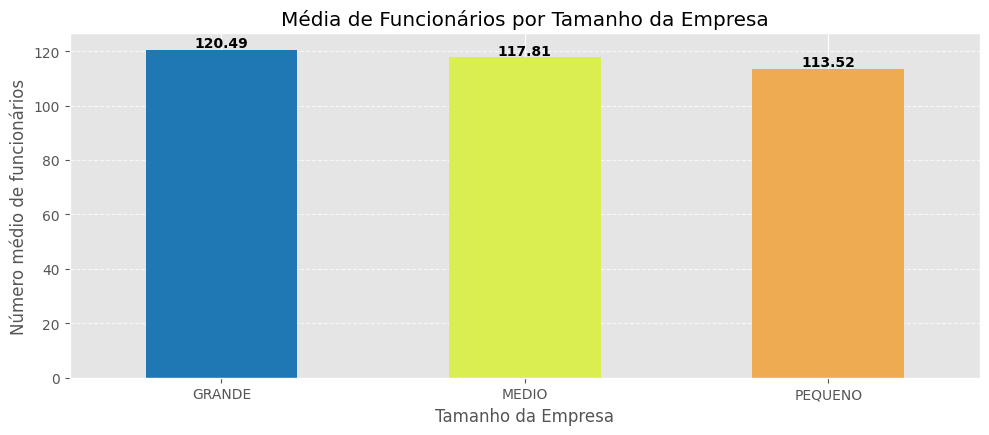

In [22]:
media_func = df_explor.groupby('PORTE')['NO_FUNCIONARIOS'].mean()

media_func.plot(kind='bar', color=['#1f77b4', '#DAED51', '#EDAC51'], figsize=(10,5))
plt.style.use('ggplot')
plt.title('Média de Funcionários por Tamanho da Empresa')
plt.ylabel('Número médio de funcionários')
plt.xlabel('Tamanho da Empresa')
plt.tight_layout()
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, valor in enumerate(media_func.values):
    plt.text(i, valor + 0.9, f'{valor:.2f}', ha='center', fontsize=10, fontweight='bold')

plt.show()

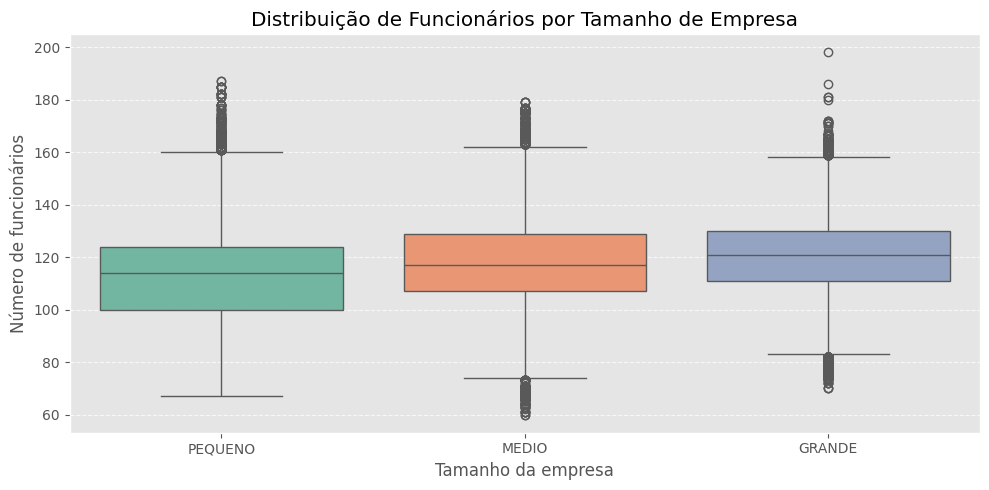

In [21]:
plt.figure(figsize=(10,5))
sns.boxplot(x='PORTE', y='NO_FUNCIONARIOS', data=df_explor, palette='Set2')
plt.title('Distribuição de Funcionários por Tamanho de Empresa')
plt.xlabel('Tamanho da empresa')
plt.ylabel('Número de funcionários')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

É importante termos essa relação, pois:
- É um indicador de capacidade operacional;
- Menos risco de inadimplência;
- Auxliar na segmentação de clientes

## 2.4 Analise do Segmento Industrial

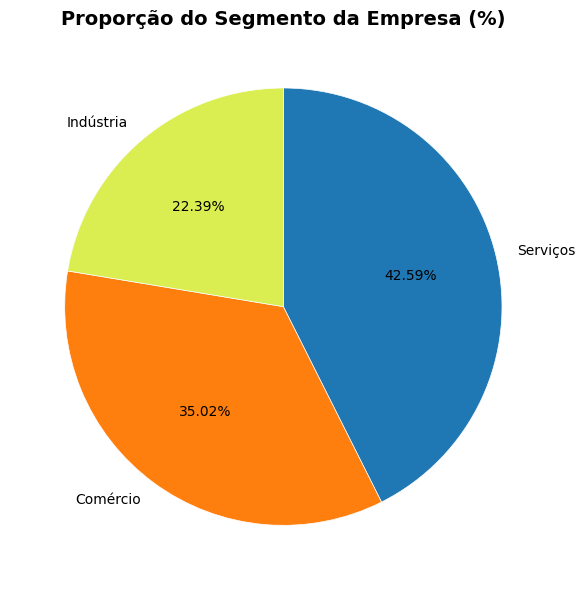

In [29]:
# Classificação do Segmento Industrial
contagem_segmento = df_explor['SEGMENTO_INDUSTRIAL'].value_counts(normalize=True)*100

# Gráfico
# Lista de cores — pode ser qualquer sequência
cores = ['#1f77b4', '#ff7f0e', '#DAED51']
plt.figure(figsize=(10,6))
plt.style.use('ggplot')

plt.pie(
    contagem_segmento.values,
    labels=contagem_segmento.index,
    autopct='%1.2f%%',
    colors=cores[:len(contagem_segmento)],
    startangle=90,
    counterclock=False,
    wedgeprops={'edgecolor': 'white'}
)

plt.title('Proporção do Segmento da Empresa (%)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


## 2.5 Correlação entre Porte da Empresa e Segmento em ela atua

In [30]:
porte_por_seg = df_explor.groupby('PORTE')['SEGMENTO_INDUSTRIAL'].value_counts(normalize=True)*100
print(porte_por_seg)

PORTE    SEGMENTO_INDUSTRIAL
GRANDE   Serviços               45.138697
         Comércio               37.199834
         Indústria              17.661468
MEDIO    Serviços               38.330552
         Comércio               34.362445
         Indústria              27.307003
PEQUENO  Serviços               46.605965
         Comércio               32.408163
         Indústria              20.985871
Name: proportion, dtype: float64


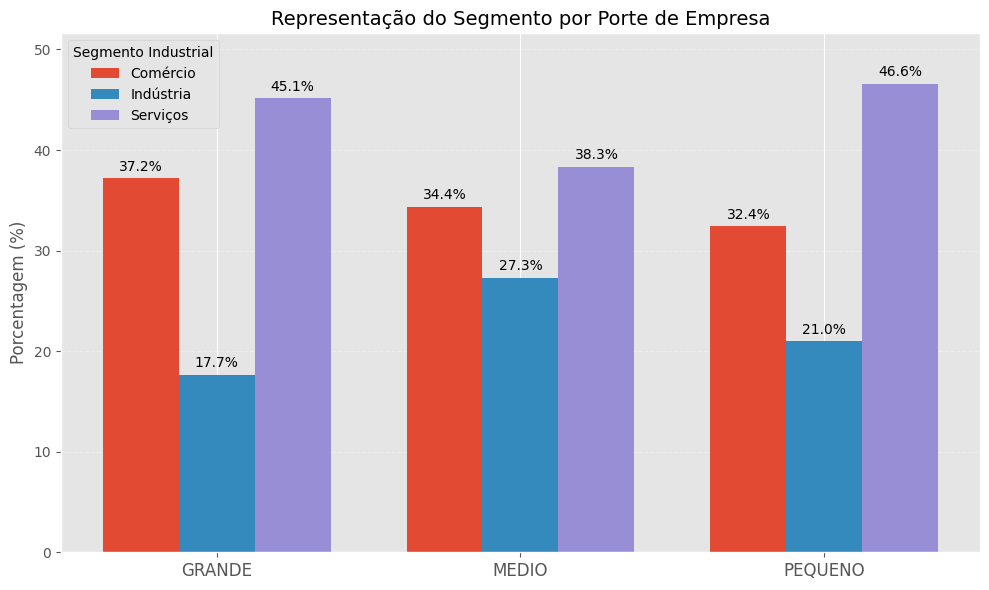

In [31]:
# df_plot: DataFrame com índice = portes (ex: ['GRANDE','MEDIO','PEQUENO'])
# e colunas = segmentos (ex: ['Serviço','Comércio','Indústria']) com valores em porcentagem.
# Ex.: df_plot = porte_por_seg.unstack()

df_plot = porte_por_seg.unstack()  # Converte MultiIndex para tabela

n_groups = len(df_plot.index)
n_seg = len(df_plot.columns)
x = np.arange(n_groups)

largura = 0.25  # largura de cada barra
# calculamos deslocamentos centrados: por ex. para 3 barras -> [-largura, 0, +largura]
offsets = (np.arange(n_seg) - (n_seg - 1) / 2 ) * largura

plt.figure(figsize=(10,6))

# Plot de cada segmento com deslocamento apropriado
for j, seg in enumerate(df_plot.columns):
    positions = x + offsets[j]
    plt.bar(positions, df_plot[seg].values, width=largura, label=seg)

# Ajustes de rótulos e título
plt.xticks(x, df_plot.index, fontsize=12)
plt.ylabel("Porcentagem (%)", fontsize=12)
plt.title("Representação do Segmento por Porte de Empresa", fontsize=14)

# Ajustar limite superior para que as labels caibam
ymax = df_plot.values.max()
plt.ylim(0, ymax + max(5, 0.08*ymax))  # margem de 5 unidades ou 8% do máximo

# Adicionar valores sobre as barras, centralizados na posição correta
for j, seg in enumerate(df_plot.columns):
    positions = x + offsets[j]
    for xi, valor in zip(positions, df_plot[seg].values):
        plt.text(xi, valor + (0.01*ymax), f"{valor:.1f}%", ha='center', va='bottom', fontsize=10)

plt.legend(title="Segmento Industrial")
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()



## 2.6 Onde estão localizadas essa empresas
Analisando os primeiros dois dígitos do CEP, podemos analisar a localizar das empresas.

In [32]:
df_explor['CEP_2_DIG'].value_counts().head(10).to_frame().style.background_gradient(cmap='Blues')

,count
CEP_2_DIG,
13,3884
35,2845
68,2603
89,2588
86,2135
37,2107
12,2076
78,2006
75,1773


De acordo com site dos correios, podemos obter informações sobre como o CEP funciona e o que os digitos pode nos dizer.
Cada número de CEP corrensponde a uma Região, Sub-região, Setor, Subsetor, Divisor de Subsetor e Identificadores de Distribuição.

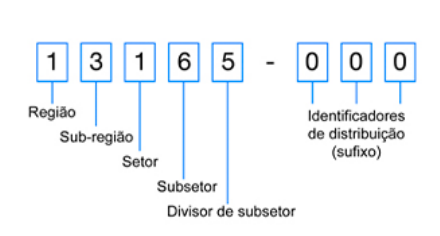

O Brasil foi divido em dez regiões postais, indo do **0 ao 9**, o que define o primeiro número do CEP. A distribuição foi feita no sentido anti-horário, a partir do estado de São Paulo.

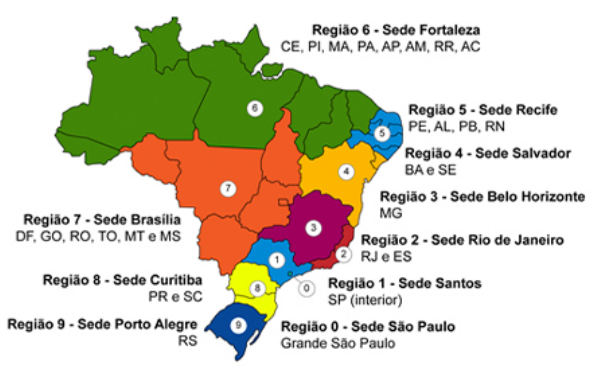

- **Região 0 :** grande São Paulo;
- **Região 1:** interior de São Paulo;
- **Região 2:** Rio de Janeiro e Espírito Santo;
- **Região 3:** Minas Gerais;
- **Região 4:** Bahia e Sergipe;
- **Região 5:** Pernambuco, Alagoas, Paraíba e Rio Grande do Norte;
- **Região 6:** Ceará, Piauí, Maranhão, Pará, Roraima, Amapá, Acre e Amazonas;
- **Região 7:** Distrito Federal, Goiás, Rondônia, Tocantins, Mato Grosso e Mato Grosso do Sul;
- **Região 8:** Paraná e Santa Catarina;
- **Região 9:** Rio Grande do Sul.

Com base nessa informação podemos ver que o top 10 localidades das empresas são:
- 1 - Interior de São Paulo;
- 2 - Minas Gerais;
- 3 - Ceará, Piauí, Maranhão, Pará, Roraima, Amapá, Acre e Amazonas;
- 4 e 5 - Paraná e Santa Catarina;
- 6 - Minas Gerais;
- 7 - Interior de São Paulo
- 8 e 9 - Distrito Federal, Goiás, Rondônia, Tocantins, Mato Grosso e Mato Grosso do Sul;
- 10 - Minas Gerais.

# 3 Preparando Dataset para Machine Learning
Nesta etapa vou iniciar os preparativos para o treinamento do modelo preditivo, irei deixar o dataset no formato ideal.

## 3.1 Empresa PJ ou PF
Uma informação que temos é que esta coluna está classificada da seguinte maneira:Indica se o cliente é uma pessoa física (‘X’) ou jurídica (‘NaN’).

Vamos converter esssas informações nesse outro formato.
- 1 para Jurídica
- 0 para Pessoa Física

In [33]:
# Aplicando função lambda para 1 = Jurídico e 0 = Pessoa Física
df_explor['PJ_ou_PF'] = df_explor.FLAG_PF.apply(lambda x:1 if x == 'Juridico' else 0)

In [34]:
# Verificação e contagem
df_explor[['FLAG_PF', 'PJ_ou_PF']].value_counts()

FLAG_PF        PJ_ou_PF
Juridico       1           77195
Pessoa_Fisica  0              72
Name: count, dtype: int64

## 3.2 Segmento em que a Empresa Atual
Aqui irei aplicar uma técnica chamada **OneHotEncoder**, sua função principal é converter variáveis categóricas nominais (dados que representam categorias sem uma ordem inerente) em um formato numérico que os algoritmos de aprendizado de máquina possam entender e processar de maneira eficaz. 

In [ ]:
# COntagem do valores do segmento industrial
df_explor.SEGMENTO_INDUSTRIAL.value_counts()

SEGMENTO_INDUSTRIAL
Serviços     32908
Comércio     27062
Indústria    17297
Name: count, dtype: int64

In [35]:
# Import
from sklearn.preprocessing import OneHotEncoder

In [36]:
# Criando o encoder (Codificador)
seg_ind = OneHotEncoder(handle_unknown='ignore')

# Fazendo o fit com os dados
seg_ind = seg_ind.fit(df_explor[['SEGMENTO_INDUSTRIAL']])

In [37]:
# Transformando os dados
seg_ind.transform(df_explor[['SEGMENTO_INDUSTRIAL']])

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 77267 stored elements and shape (77267, 3)>

In [38]:
# Visualizando em um array
seg_ind.transform(df_explor[['SEGMENTO_INDUSTRIAL']]).toarray()

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.]], shape=(77267, 3))

In [39]:
# Transformando em um dataframe
df_seg_ind = pd.DataFrame(seg_ind.transform(df_explor[['SEGMENTO_INDUSTRIAL']]).toarray())
df_seg_ind

,0,1,2
0,0.0,0.0,1.0
1,0.0,0.0,1.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0
...,...,...,...
77262,1.0,0.0,0.0
77263,0.0,1.0,0.0
77264,0.0,0.0,1.0
77265,0.0,0.0,1.0


In [40]:
# Obtendo o nome das colunas
colunas_seg_ind = seg_ind.get_feature_names_out()
colunas_seg_ind

array(['SEGMENTO_INDUSTRIAL_Comércio', 'SEGMENTO_INDUSTRIAL_Indústria',
       'SEGMENTO_INDUSTRIAL_Serviços'], dtype=object)

In [41]:
# Formatando o nome das colunas no novo dataframe
df_seg_ind = pd.DataFrame(seg_ind.transform(df_explor[['SEGMENTO_INDUSTRIAL']]).toarray(),
                          columns = colunas_seg_ind,
                          dtype = 'int32')
df_seg_ind

,SEGMENTO_INDUSTRIAL_Comércio,SEGMENTO_INDUSTRIAL_Indústria,SEGMENTO_INDUSTRIAL_Serviços
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
77262,1,0,0
77263,0,1,0
77264,0,0,1
77265,0,0,1


In [42]:
# Juntar (concatenar) os dois dataframe
df_explor = pd.concat([df_explor,df_seg_ind], axis = 1)
display(df_explor)

,ID_CLIENTE,SAFRA_REF,DATA_EMISSAO_DOCUMENTO,DATA_PAGAMENTO,DATA_VENCIMENTO,VALOR_A_PAGAR,TAXA,RENDA_MES_ANTERIOR,NO_FUNCIONARIOS,DATA_CADASTRO,FLAG_PF,SEGMENTO_INDUSTRIAL,DOMINIO_EMAIL,PORTE,CEP_2_DIG,PJ_ou_PF,SEGMENTO_INDUSTRIAL_Comércio,SEGMENTO_INDUSTRIAL_Indústria,SEGMENTO_INDUSTRIAL_Serviços
0,1661240395903230676,2018-08,2018-08-17,2018-09-06,2018-09-06,35516.41,6.99,217640.0,115.0,2013-08-22,Juridico,Serviços,YAHOO,PEQUENO,65,1,0,0,1
1,1661240395903230676,2018-08,2018-08-19,2018-09-11,2018-09-10,17758.21,6.99,217640.0,115.0,2013-08-22,Juridico,Serviços,YAHOO,PEQUENO,65,1,0,0,1
2,1661240395903230676,2018-08,2018-08-26,2018-09-18,2018-09-17,17431.96,6.99,217640.0,115.0,2013-08-22,Juridico,Serviços,YAHOO,PEQUENO,65,1,0,0,1
3,1661240395903230676,2018-08,2018-08-30,2018-10-11,2018-10-05,1341.00,6.99,217640.0,115.0,2013-08-22,Juridico,Serviços,YAHOO,PEQUENO,65,1,0,0,1
4,1661240395903230676,2018-08,2018-08-31,2018-09-20,2018-09-20,21309.85,6.99,217640.0,115.0,2013-08-22,Juridico,Serviços,YAHOO,PEQUENO,65,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77262,2951563549197799278,2021-06,2021-06-30,2021-07-16,2021-07-16,89980.00,5.99,280343.0,161.0,2000-08-15,Juridico,Comércio,AOL,PEQUENO,13,1,1,0,0
77263,5220206408301580591,2021-06,2021-06-30,2021-08-16,2021-08-16,42239.00,5.99,235315.0,87.0,2021-04-08,Juridico,Indústria,GMAIL,GRANDE,25,1,0,1,0
77264,5860276371789140450,2021-06,2021-06-30,2021-07-16,2021-07-16,20921.50,5.99,100006.0,122.0,2011-02-15,Juridico,Serviços,HOTMAIL,GRANDE,67,1,0,0,1
77265,2814790209436551216,2021-06,2021-06-30,2021-07-16,2021-07-16,90231.05,6.99,234489.0,115.0,2021-05-13,Juridico,Serviços,YAHOO,MEDIO,14,1,0,0,1


In [43]:
df_explor.groupby('SEGMENTO_INDUSTRIAL')[colunas_seg_ind].sum().style.background_gradient(cmap='Blues')

,SEGMENTO_INDUSTRIAL_Comércio,SEGMENTO_INDUSTRIAL_Indústria,SEGMENTO_INDUSTRIAL_Serviços
SEGMENTO_INDUSTRIAL,,,
Comércio,27062,0,0
Indústria,0,17297,0
Serviços,0,0,32908


## 3.3 Tamanho da Empresa
Aqui irei utilizar outra estrátegia de encoder o OrdinalEncoder que é utilizada para converter dados categóricos ordinais em valores numéricos inteiros. Ele é projetado para variáveis que possuem uma ordem ou hierarquia natural.

In [ ]:
# Contagem dos valores da coluna PORTE
df_explor.PORTE.value_counts()

PORTE
MEDIO      32358
GRANDE     28984
PEQUENO    15925
Name: count, dtype: int64

In [ ]:
# Separando uma variável com o nome do tamanho da empresa
tam_empresa = ['PEQUENO', 'MEDIO', 'GRANDE']

In [47]:
# import
from sklearn.preprocessing import OrdinalEncoder

In [48]:
# Definindo o codificador
enc = OrdinalEncoder(categories = [tam_empresa], dtype = 'int32')

# Fazendo o fit
enc = enc.fit(df_explor[['PORTE']])

# transformação
enc.transform(df_explor[['PORTE']])

array([[0],
       [0],
       [0],
       ...,
       [2],
       [1],
       [2]], shape=(77267, 1), dtype=int32)

In [49]:
# salvando valores em uma nova coluna
df_explor['Tam_Empresa'] = enc.transform(df_explor[['PORTE']])

In [ ]:
# Verificando a contagem dos valores depois do OrdinalEncoder
df_explor[['PORTE', 'Tam_Empresa']].value_counts().sort_index().to_frame().style.background_gradient(cmap='Blues')

,,count
PORTE,Tam_Empresa,
GRANDE,2,28984
MEDIO,1,32358
PEQUENO,0,15925


In [50]:
display(df_explor)

,ID_CLIENTE,SAFRA_REF,DATA_EMISSAO_DOCUMENTO,DATA_PAGAMENTO,DATA_VENCIMENTO,VALOR_A_PAGAR,TAXA,RENDA_MES_ANTERIOR,NO_FUNCIONARIOS,DATA_CADASTRO,FLAG_PF,SEGMENTO_INDUSTRIAL,DOMINIO_EMAIL,PORTE,CEP_2_DIG,PJ_ou_PF,SEGMENTO_INDUSTRIAL_Comércio,SEGMENTO_INDUSTRIAL_Indústria,SEGMENTO_INDUSTRIAL_Serviços,Tam_Empresa
0,1661240395903230676,2018-08,2018-08-17,2018-09-06,2018-09-06,35516.41,6.99,217640.0,115.0,2013-08-22,Juridico,Serviços,YAHOO,PEQUENO,65,1,0,0,1,0
1,1661240395903230676,2018-08,2018-08-19,2018-09-11,2018-09-10,17758.21,6.99,217640.0,115.0,2013-08-22,Juridico,Serviços,YAHOO,PEQUENO,65,1,0,0,1,0
2,1661240395903230676,2018-08,2018-08-26,2018-09-18,2018-09-17,17431.96,6.99,217640.0,115.0,2013-08-22,Juridico,Serviços,YAHOO,PEQUENO,65,1,0,0,1,0
3,1661240395903230676,2018-08,2018-08-30,2018-10-11,2018-10-05,1341.00,6.99,217640.0,115.0,2013-08-22,Juridico,Serviços,YAHOO,PEQUENO,65,1,0,0,1,0
4,1661240395903230676,2018-08,2018-08-31,2018-09-20,2018-09-20,21309.85,6.99,217640.0,115.0,2013-08-22,Juridico,Serviços,YAHOO,PEQUENO,65,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77262,2951563549197799278,2021-06,2021-06-30,2021-07-16,2021-07-16,89980.00,5.99,280343.0,161.0,2000-08-15,Juridico,Comércio,AOL,PEQUENO,13,1,1,0,0,0
77263,5220206408301580591,2021-06,2021-06-30,2021-08-16,2021-08-16,42239.00,5.99,235315.0,87.0,2021-04-08,Juridico,Indústria,GMAIL,GRANDE,25,1,0,1,0,2
77264,5860276371789140450,2021-06,2021-06-30,2021-07-16,2021-07-16,20921.50,5.99,100006.0,122.0,2011-02-15,Juridico,Serviços,HOTMAIL,GRANDE,67,1,0,0,1,2
77265,2814790209436551216,2021-06,2021-06-30,2021-07-16,2021-07-16,90231.05,6.99,234489.0,115.0,2021-05-13,Juridico,Serviços,YAHOO,MEDIO,14,1,0,0,1,1


## 3.4 Análise das Datas
Nesta seção irei formatar as datas, já o ML não lida bem com este tipo de dado.

In [51]:
# Transformar colunas object para datetime
cols = ['DATA_EMISSAO_DOCUMENTO', 'DATA_PAGAMENTO', 'DATA_VENCIMENTO']
df_explor[cols] = df_explor[cols].apply(pd.to_datetime)

# Calculo da diferença em dias da data de pagamento e vencimento
df_explor['DIF_DATA'] = (df_explor['DATA_PAGAMENTO'] - df_explor['DATA_VENCIMENTO']).dt.days

In [52]:
# Cálculo da Inadimplência
df_explor['INADIMPLENCIA'] = np.where(df_explor['DIF_DATA'] >= 5, 1, 0)
display(df_explor)

,ID_CLIENTE,SAFRA_REF,DATA_EMISSAO_DOCUMENTO,DATA_PAGAMENTO,DATA_VENCIMENTO,VALOR_A_PAGAR,TAXA,RENDA_MES_ANTERIOR,NO_FUNCIONARIOS,DATA_CADASTRO,...,DOMINIO_EMAIL,PORTE,CEP_2_DIG,PJ_ou_PF,SEGMENTO_INDUSTRIAL_Comércio,SEGMENTO_INDUSTRIAL_Indústria,SEGMENTO_INDUSTRIAL_Serviços,Tam_Empresa,DIF_DATA,INADIMPLENCIA
0,1661240395903230676,2018-08,2018-08-17,2018-09-06,2018-09-06,35516.41,6.99,217640.0,115.0,2013-08-22,...,YAHOO,PEQUENO,65,1,0,0,1,0,0,0
1,1661240395903230676,2018-08,2018-08-19,2018-09-11,2018-09-10,17758.21,6.99,217640.0,115.0,2013-08-22,...,YAHOO,PEQUENO,65,1,0,0,1,0,1,0
2,1661240395903230676,2018-08,2018-08-26,2018-09-18,2018-09-17,17431.96,6.99,217640.0,115.0,2013-08-22,...,YAHOO,PEQUENO,65,1,0,0,1,0,1,0
3,1661240395903230676,2018-08,2018-08-30,2018-10-11,2018-10-05,1341.00,6.99,217640.0,115.0,2013-08-22,...,YAHOO,PEQUENO,65,1,0,0,1,0,6,1
4,1661240395903230676,2018-08,2018-08-31,2018-09-20,2018-09-20,21309.85,6.99,217640.0,115.0,2013-08-22,...,YAHOO,PEQUENO,65,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77262,2951563549197799278,2021-06,2021-06-30,2021-07-16,2021-07-16,89980.00,5.99,280343.0,161.0,2000-08-15,...,AOL,PEQUENO,13,1,1,0,0,0,0,0
77263,5220206408301580591,2021-06,2021-06-30,2021-08-16,2021-08-16,42239.00,5.99,235315.0,87.0,2021-04-08,...,GMAIL,GRANDE,25,1,0,1,0,2,0,0
77264,5860276371789140450,2021-06,2021-06-30,2021-07-16,2021-07-16,20921.50,5.99,100006.0,122.0,2011-02-15,...,HOTMAIL,GRANDE,67,1,0,0,1,2,0,0
77265,2814790209436551216,2021-06,2021-06-30,2021-07-16,2021-07-16,90231.05,6.99,234489.0,115.0,2021-05-13,...,YAHOO,MEDIO,14,1,0,0,1,1,0,0


Separa os dados das colunas: `EMISSAO_DOCUMENTO`, `DATA_VENCIMENTO`.

In [53]:
# Coluna Emissão Documentos
df_explor["Mes_Emissao_Documento"] = df_explor["DATA_EMISSAO_DOCUMENTO"].dt.month
df_explor["Dia_Emissao_Documento"] = df_explor["DATA_EMISSAO_DOCUMENTO"].dt.day

# Coluna Mês Vencimento 
df_explor["Mes_Vencimento"] = df_explor["DATA_VENCIMENTO"].dt.month
df_explor["Dia_Vencimento"] = df_explor["DATA_VENCIMENTO"].dt.day

display(df_explor)

,ID_CLIENTE,SAFRA_REF,DATA_EMISSAO_DOCUMENTO,DATA_PAGAMENTO,DATA_VENCIMENTO,VALOR_A_PAGAR,TAXA,RENDA_MES_ANTERIOR,NO_FUNCIONARIOS,DATA_CADASTRO,...,SEGMENTO_INDUSTRIAL_Comércio,SEGMENTO_INDUSTRIAL_Indústria,SEGMENTO_INDUSTRIAL_Serviços,Tam_Empresa,DIF_DATA,INADIMPLENCIA,Mes_Emissao_Documento,Dia_Emissao_Documento,Mes_Vencimento,Dia_Vencimento
0,1661240395903230676,2018-08,2018-08-17,2018-09-06,2018-09-06,35516.41,6.99,217640.0,115.0,2013-08-22,...,0,0,1,0,0,0,8,17,9,6
1,1661240395903230676,2018-08,2018-08-19,2018-09-11,2018-09-10,17758.21,6.99,217640.0,115.0,2013-08-22,...,0,0,1,0,1,0,8,19,9,10
2,1661240395903230676,2018-08,2018-08-26,2018-09-18,2018-09-17,17431.96,6.99,217640.0,115.0,2013-08-22,...,0,0,1,0,1,0,8,26,9,17
3,1661240395903230676,2018-08,2018-08-30,2018-10-11,2018-10-05,1341.00,6.99,217640.0,115.0,2013-08-22,...,0,0,1,0,6,1,8,30,10,5
4,1661240395903230676,2018-08,2018-08-31,2018-09-20,2018-09-20,21309.85,6.99,217640.0,115.0,2013-08-22,...,0,0,1,0,0,0,8,31,9,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77262,2951563549197799278,2021-06,2021-06-30,2021-07-16,2021-07-16,89980.00,5.99,280343.0,161.0,2000-08-15,...,1,0,0,0,0,0,6,30,7,16
77263,5220206408301580591,2021-06,2021-06-30,2021-08-16,2021-08-16,42239.00,5.99,235315.0,87.0,2021-04-08,...,0,1,0,2,0,0,6,30,8,16
77264,5860276371789140450,2021-06,2021-06-30,2021-07-16,2021-07-16,20921.50,5.99,100006.0,122.0,2011-02-15,...,0,0,1,2,0,0,6,30,7,16
77265,2814790209436551216,2021-06,2021-06-30,2021-07-16,2021-07-16,90231.05,6.99,234489.0,115.0,2021-05-13,...,0,0,1,1,0,0,6,30,7,16


In [54]:
descricão(df_explor)

,Coluna,Tipo,Quantidade de Dados Não Vazios,Quantidade de Dados Vazios,Porcentagem de Valor Vazios (%)
0,ID_CLIENTE,int64,77267,0,0.000000
1,SAFRA_REF,object,77267,0,0.000000
2,DATA_EMISSAO_DOCUMENTO,datetime64[ns],77267,0,0.000000
3,DATA_PAGAMENTO,datetime64[ns],77267,0,0.000000
4,DATA_VENCIMENTO,datetime64[ns],77267,0,0.000000
5,VALOR_A_PAGAR,float64,77267,0,0.000000
6,TAXA,float64,77267,0,0.000000
7,RENDA_MES_ANTERIOR,float64,77267,0,0.000000
8,NO_FUNCIONARIOS,float64,77267,0,0.000000
9,DATA_CADASTRO,object,77267,0,0.000000


In [55]:
# Elimina as colunas que não serão utilizadas
df_explor = df_explor.drop(['ID_CLIENTE', 'SAFRA_REF', 'DATA_EMISSAO_DOCUMENTO', 'DATA_PAGAMENTO', 'DATA_VENCIMENTO', 
                            'DATA_CADASTRO', 'FLAG_PF', 'SEGMENTO_INDUSTRIAL', 'DOMINIO_EMAIL', 
                            'DIF_DATA', 'DOMINIO_EMAIL', 'PORTE','CEP_2_DIG'], axis=1)

In [56]:
display(df_explor)

,VALOR_A_PAGAR,TAXA,RENDA_MES_ANTERIOR,NO_FUNCIONARIOS,PJ_ou_PF,SEGMENTO_INDUSTRIAL_Comércio,SEGMENTO_INDUSTRIAL_Indústria,SEGMENTO_INDUSTRIAL_Serviços,Tam_Empresa,INADIMPLENCIA,Mes_Emissao_Documento,Dia_Emissao_Documento,Mes_Vencimento,Dia_Vencimento
0,35516.41,6.99,217640.0,115.0,1,0,0,1,0,0,8,17,9,6
1,17758.21,6.99,217640.0,115.0,1,0,0,1,0,0,8,19,9,10
2,17431.96,6.99,217640.0,115.0,1,0,0,1,0,0,8,26,9,17
3,1341.00,6.99,217640.0,115.0,1,0,0,1,0,1,8,30,10,5
4,21309.85,6.99,217640.0,115.0,1,0,0,1,0,0,8,31,9,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77262,89980.00,5.99,280343.0,161.0,1,1,0,0,0,0,6,30,7,16
77263,42239.00,5.99,235315.0,87.0,1,0,1,0,2,0,6,30,8,16
77264,20921.50,5.99,100006.0,122.0,1,0,0,1,2,0,6,30,7,16
77265,90231.05,6.99,234489.0,115.0,1,0,0,1,1,0,6,30,7,16


In [42]:
df_explor.to_csv('docs/dataset_limpo.csv', index=False)